In [1]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import pandas as pd
from gensim.models import FastText
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
from gensim.models import FastText
from gensim.test.utils import datapath
from gensim.models.callbacks import CallbackAny2Vec

In [ ]:
import torch

# Assuming 'model' is your PyTorch model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
class EpochLogger(CallbackAny2Vec):

    '''Callback to log information about training'''


    def __init__(self):
        self.epoch = 0


    def on_epoch_begin(self, model):
        print("Epoch #{} start".format(self.epoch))


    def on_epoch_end(self, model):
        print("Epoch #{} end".format(self.epoch))
        self.epoch += 1

In [ ]:
classes = [i for i in range(1, 10)]
class_id_to_name = {
    1: "Ramnit",
    2: "Lollipop",
    3: "Kelihos_ver3",
    4: "Vundo",
    5: "Simda",
    6: "Tracur",
    7: "Kelihos_ver1",
    8: "Obfuscator.ACY",
    9: "Gatak"
}

In [ ]:
model = FastText.load("fast_text-malware.bin")

In [ ]:
model.wv.most_similar("push")[:5]

[('call', 0.9248364567756653),
 ('Push', 0.8046486377716064),
 ("call\\n'", 0.6130177974700928),
 ('pop', 0.573036789894104),
 ('retn', 0.5565561652183533)]

In [ ]:
model.wv.most_similar("mov")[:5]

[('Std', 0.3800610303878784),
 ('std', 0.30256927013397217),
 ('add', 0.2862606346607208),
 ('sub', 0.26875928044319153),
 ('Push', 0.2564126253128052)]

In [ ]:
model.wv.most_similar("add")[:5]

[('sub', 0.7435933351516724),
 ("add\\n'", 0.4760264754295349),
 ('adc', 0.4132165312767029),
 ("sub\\n'", 0.4004565477371216),
 ('sar', 0.3649453818798065)]

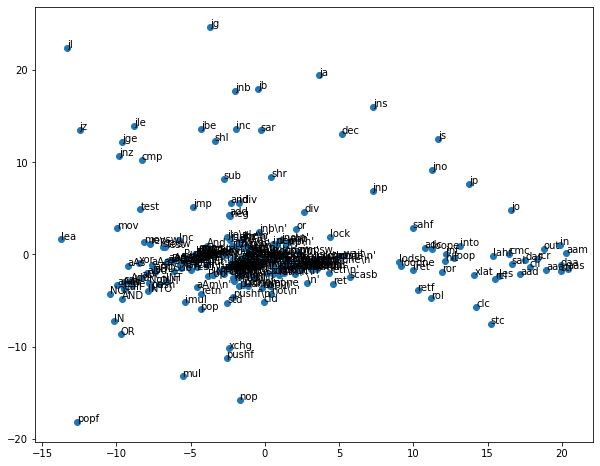

In [ ]:
X = [model.wv.get_vector(word) for word in model.wv.index_to_key]
pca = PCA(n_components=2)
results = pca.fit_transform(X)
plt.figure(figsize=(10, 8))
plt.scatter(results[:, 0], results[:, 1])
codes = model.wv.index_to_key
for idx, code in enumerate(codes):
    plt.annotate(code, xy=(results[idx, 0], results[idx, 1]))
plt.show()


In [4]:
file_path = '/content/gdrive/MyDrive/data/dataset.csv'

# Read CSV file into a Pandas DataFrame
temp_df = pd.read_csv(file_path)
temp_df.head()

,ID,Opcodes,Family
0,Hz8NEvBRqL31AdfQgmFn,"push,mov,push,push,push,call,mov,add,test,jnz,...",1
1,2LR1cT43f809ZG6KUd5l,"mov,lea,push,or,jmp,mov,inc,mov,inc,add,jnz,mo...",8
2,5DumcTR1Yk7N9FICzSBe,"mov,jmp,push,mov,mov,call,test,jz,push,call,ad...",2
3,a7sedvqXEgJMYwAIo93j,"mov,push,mov,sub,lea,adc,push,push,call,add,po...",3
4,JK7liDHzL1AIfrPCcFTZ,"push,lea,push,mov,call,mov,mov,pop,retn,mov,jm...",2


In [5]:
test = pd.read_csv('/content/gdrive/MyDrive/data/result_embed.csv')
test.head()

,ID,Family,0,1,2,3,4,5,6,7,...,90,91,92,93,94,95,96,97,98,99
0,01kcPWA9K2BOxQeS5Rju,1,-0.338611,1.291727,0.118837,-1.118286,0.183966,-0.405247,-0.729886,-0.332307,...,-0.475346,-0.425257,-0.000070,0.276955,0.192112,1.176439,-0.234972,-0.730219,1.071440,-0.091770
1,04EjIdbPV5e1XroFOpiN,1,-0.428330,1.376984,0.234024,-0.627847,0.213055,-0.609343,-0.659496,-0.320076,...,-0.408290,-0.389868,-0.164271,0.207200,0.035918,1.313510,-0.123089,-0.806177,1.062548,-0.169090
2,05EeG39MTRrI6VY21DPd,1,-0.377473,1.542212,0.202506,-0.368294,0.447894,-0.722350,-0.336275,-0.411114,...,-0.553859,-0.478773,-0.139812,0.208929,0.004945,1.640448,-0.340988,-0.576668,1.164637,-0.100652
3,05rJTUWYAKNegBk2wE8X,1,-0.354789,1.304047,0.117015,-0.903091,0.150693,-0.642379,-0.896521,-0.305303,...,-0.351606,-0.341613,-0.220712,0.312799,0.046395,1.294530,-0.131182,-0.718261,1.172608,-0.229033
4,0AnoOZDNbPXIr2MRBSCJ,1,-0.175248,1.296375,-0.155661,-0.533257,0.156963,-0.595596,-0.341953,-0.253579,...,-0.324669,-0.036423,-0.272495,-0.101691,0.137479,1.847042,-0.233596,-0.768067,0.979953,0.340067


In [6]:
temp_df= pd.DataFrame(test['ID']).merge(temp_df, on='ID').reset_index(drop = True)
temp_df.head()

,ID,Opcodes,Family
0,01kcPWA9K2BOxQeS5Rju,"push,push,mov,push,mov,sub,mov,push,push,lea,m...",1
1,04EjIdbPV5e1XroFOpiN,"push,push,mov,push,mov,mov,mov,lea,push,retn,m...",1
2,05EeG39MTRrI6VY21DPd,"push,mov,mov,test,mov,jz,push,call,mov,test,jz...",1
3,05rJTUWYAKNegBk2wE8X,"cmp,jnz,test,jnz,retn,mov,push,mov,mov,push,mo...",1
4,0AnoOZDNbPXIr2MRBSCJ,"push,mov,sub,mov,and,and,push,push,mov,cmp,mov...",1


In [ ]:
def get_doc_vector(doc_tokens, embed_size=100):
    doc_vec = np.zeros((1, embed_size), dtype=np.float64)
    doc_tokens=doc_tokens.split()
    for token in doc_tokens:
        try:
            doc_vec += model.wv.get_vector(token)
        except KeyError:
            pass
    doc_vec /= len(doc_tokens)
    return doc_vec


In [ ]:
tqdm.pandas(desc="Processing rows", position=0, leave=True)
temp_df['doc_vector'] = temp_df['Opcodes'].progress_apply(lambda x: get_doc_vector(x))

Processing rows: 100%|███████████████████████████████████████████████████████████| 10868/10868 [34:06<00:00,  5.31it/s]


In [ ]:
temp_df['doc_vector']=temp_df['doc_vector'].apply(lambda vectors: vectors[0])
temp_df.head()

,ID,Opcodes,Family,doc_vector
0,01kcPWA9K2BOxQeS5Rju,"push,push,mov,push,mov,sub,mov,push,push,lea,m...",1,"[-0.007272358518093824, 0.0202903151512146, 0...."
1,04EjIdbPV5e1XroFOpiN,"push,push,mov,push,mov,mov,mov,lea,push,retn,m...",1,"[0.0022065501967778885, 0.011674574322212052, ..."
2,05EeG39MTRrI6VY21DPd,"push,mov,mov,test,mov,jz,push,call,mov,test,jz...",1,"[-0.017946587581688565, 0.00014400084791358852..."
3,05rJTUWYAKNegBk2wE8X,"cmp,jnz,test,jnz,retn,mov,push,mov,mov,push,mo...",1,"[0.011005133978952714, 0.01550382293194899, -0..."
4,0AnoOZDNbPXIr2MRBSCJ,"push,mov,sub,mov,and,and,push,push,mov,cmp,mov...",1,"[-0.02835857189913379, 0.002139777794831781, -..."


In [ ]:
import pandas as pd
import numpy as np

# Assuming your dataframe is named df
doc_vector_dict = {}

# Group the dataframe by the 'Family' column
grouped_df = temp_df.groupby('Family')

# Iterate through each group
for family, family_group in grouped_df:
    # Extract the document vectors for the current family
    family_vectors = np.array(family_group['doc_vector'].tolist())

    # Store the document vectors in the dictionary
    doc_vector_dict[family] = family_vectors

    # Print the shape of the document vectors for each family
    print(f"Family {family}: {family_vectors.shape}")

Family 1: (1541, 100)
Family 2: (2478, 100)
Family 3: (2942, 100)
Family 4: (475, 100)
Family 5: (42, 100)
Family 6: (751, 100)
Family 7: (398, 100)
Family 8: (1228, 100)
Family 9: (1013, 100)


In [7]:
# Split the Opcodes column into a list of opcodes
temp_df['Opcodes'] = temp_df['Opcodes'].apply(lambda x: x.split(','))

# Create new columns for push, pop, and mov and calculate their frequencies
temp_df['push'] = temp_df['Opcodes'].apply(lambda x: x.count('push'))
temp_df['pop'] = temp_df['Opcodes'].apply(lambda x: x.count('pop'))
temp_df['mov'] = temp_df['Opcodes'].apply(lambda x: x.count('mov'))

In [12]:
from sklearn.preprocessing import MinMaxScaler
columns_to_normalize = ['push', 'pop', 'mov']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
temp_df[columns_to_normalize] = scaler.fit_transform(temp_df[columns_to_normalize])


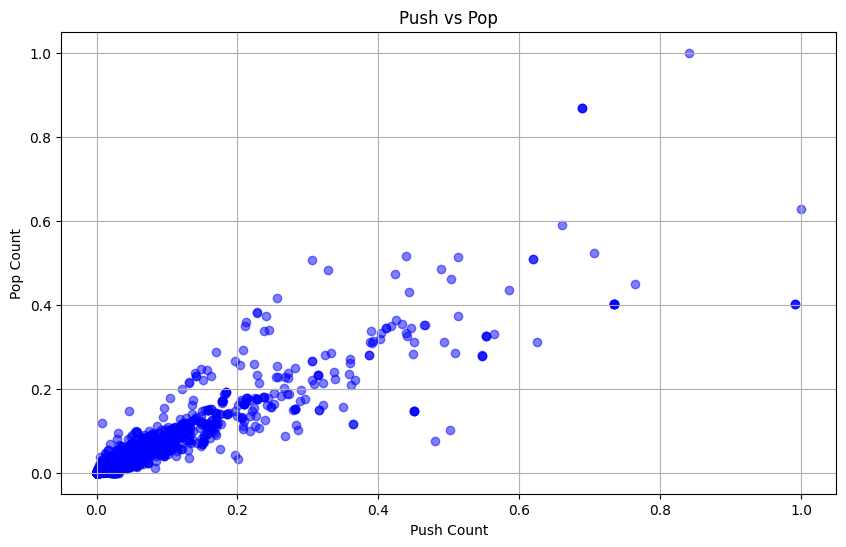

In [13]:
import matplotlib.pyplot as plt

# Assuming 'temp_df' is your dataframe

# Scatter plot for push vs pop
plt.figure(figsize=(10, 6))
plt.scatter(temp_df['push'], temp_df['pop'], c='blue', alpha=0.5)
plt.title('Push vs Pop')
plt.xlabel('Push Count')
plt.ylabel('Pop Count')
plt.grid(True)
plt.show()


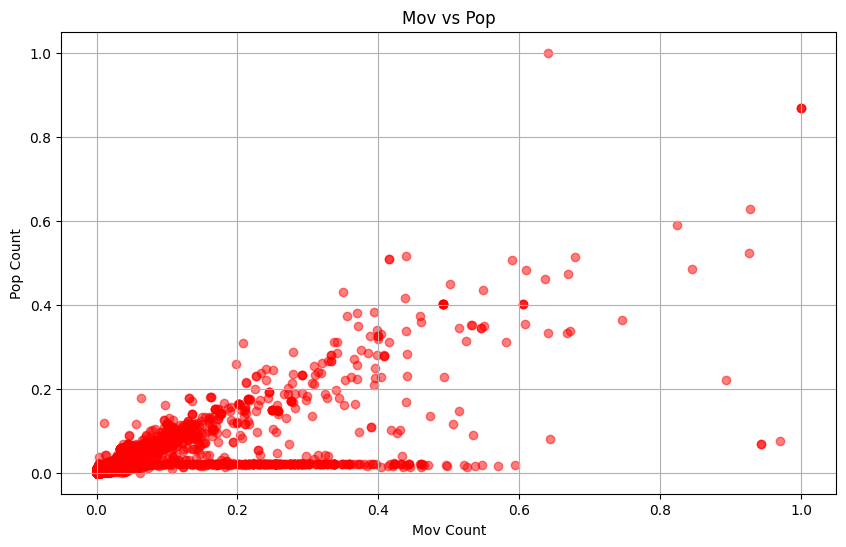

In [14]:
# Scatter plot for mov vs pop
plt.figure(figsize=(10, 6))
plt.scatter(temp_df['mov'], temp_df['pop'], c='red', alpha=0.5)
plt.title('Mov vs Pop')
plt.xlabel('Mov Count')
plt.ylabel('Pop Count')
plt.grid(True)
plt.show()

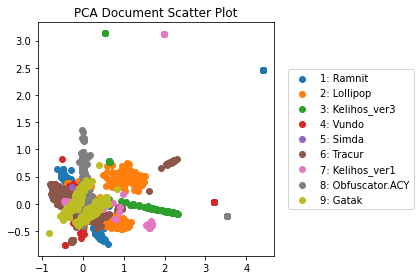

In [ ]:
for k, v in doc_vector_dict.items():
    projections = pca.fit_transform(v)
    plt.scatter(projections[:, 0], projections[:, 1], label=f"{k}: {class_id_to_name[k]}")
plt.title("PCA Document Scatter Plot")
plt.legend(loc="center left", bbox_to_anchor=(1.04, 0.5))
plt.tight_layout()
plt.show()

C:\Users\Abhignya Bhat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Abhignya Bhat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Abhignya Bhat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Abhignya Bhat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Abhignya Bhat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: F

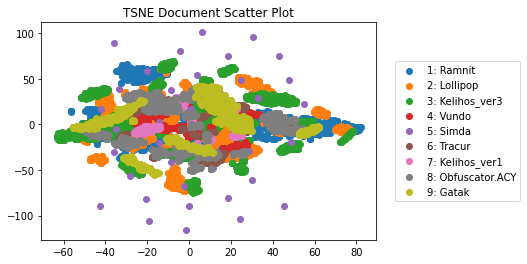

In [ ]:
tsne = TSNE(n_components=2)

for k, v in doc_vector_dict.items():
    projections = tsne.fit_transform(v)
    plt.scatter(projections[:, 0], projections[:, 1], label=f"{k}: {class_id_to_name[k]}")

plt.title("TSNE Document Scatter Plot")
plt.legend(loc="center left", bbox_to_anchor=(1.04, 0.5))
plt.show()